# Credit card default classification

The goal of this notebook is to classify the credit card default (the chance that companies or individuals will not be able to return the money lent on time). The data comes from American Express, which is an American bank holding company and multinational financial services corporation that specializes in payment cards.

Task: binary classification

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder

import os
for dirname, _, filenames in os.walk('data'):
	for filename in filenames:
		print(os.path.join(dirname, filename))

data/test.csv
data/sample_submission.csv
data/amexpert-codelab-2021.zip
data/train.csv


In [3]:
train = pd.read_csv('data/train.csv')

In [4]:
train.head()

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
0,CST_115179,ita Bose,46,F,N,Y,0.0,107934.04,612.0,Unknown,1.0,1.0,33070.28,18690.93,73,544.0,2,1,1
1,CST_121920,Alper Jonathan,29,M,N,Y,0.0,109862.62,2771.0,Laborers,2.0,0.0,15329.53,37745.19,52,857.0,0,0,0
2,CST_109330,Umesh Desai,37,M,N,Y,0.0,230153.17,204.0,Laborers,2.0,0.0,48416.60,41598.36,43,650.0,0,0,0
3,CST_128288,Rie,39,F,N,Y,0.0,122325.82,11941.0,Core staff,2.0,0.0,22574.36,32627.76,20,754.0,0,0,0
4,CST_151355,McCool,46,M,Y,Y,0.0,387286.00,1459.0,Core staff,1.0,0.0,38282.95,52950.64,75,927.0,0,0,0


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45528 entries, 0 to 45527
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_id              45528 non-null  object 
 1   name                     45528 non-null  object 
 2   age                      45528 non-null  int64  
 3   gender                   45528 non-null  object 
 4   owns_car                 44981 non-null  object 
 5   owns_house               45528 non-null  object 
 6   no_of_children           44754 non-null  float64
 7   net_yearly_income        45528 non-null  float64
 8   no_of_days_employed      45065 non-null  float64
 9   occupation_type          45528 non-null  object 
 10  total_family_members     45445 non-null  float64
 11  migrant_worker           45441 non-null  float64
 12  yearly_debt_payments     45433 non-null  float64
 13  credit_limit             45528 non-null  float64
 14  credit_limit_used(%)  

In [6]:
train = train[train['gender'] != 'XNA']

In [7]:
train.drop(columns=['name'], inplace=True)

# EDA

## Credit card default

We can say the target variable is imbalanced. The class '0' may be called the majority class, and '1' the minority class. It may be the reason of bias of our classifier. It is important for the model to give importance also for the minority class to correctly predict both classes. It is important to keep this information in mind while building the model.

Techniques how to deal with imbalanced data: https://www.analyticsvidhya.com/blog/2021/06/5-techniques-to-handle-imbalanced-data-for-a-classification-problem/

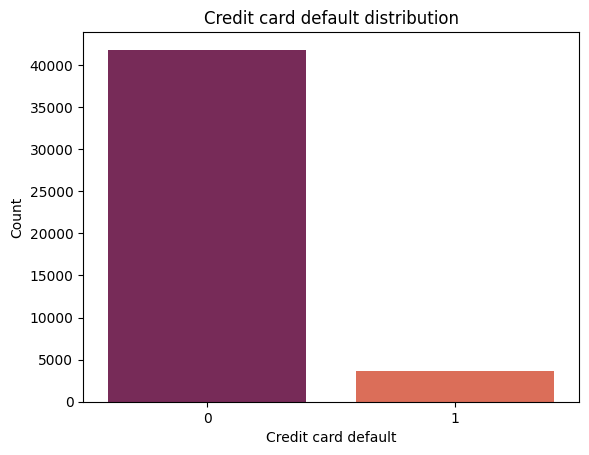

In [8]:
sns.countplot(data=train, x='credit_card_default', palette='rocket')
plt.xlabel('Credit card default')
plt.ylabel('Count')
plt.title('Credit card default distribution')
plt.show()

## Gender

The proportion of females and males with credit card default is pretty similar. On the other hand, there are more females in the dataset

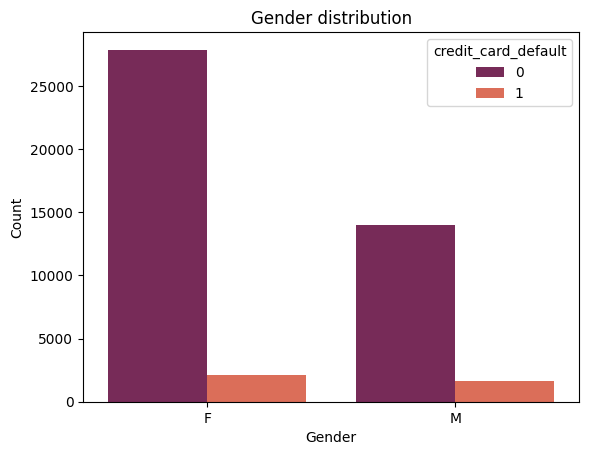

In [9]:
sns.countplot(data=train, x='gender', hue='credit_card_default', palette='rocket')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender distribution')
plt.show()

## Owns car

More people do not own a car, and the percentage of car owners and non-car owners with credit card default is similar.

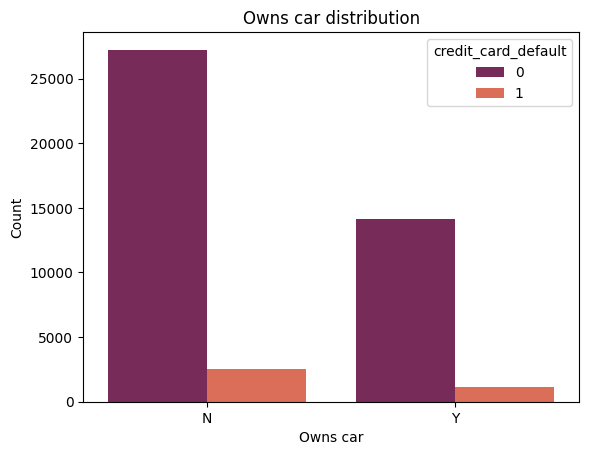

In [10]:
sns.countplot(data=train, x='owns_car', hue='credit_card_default', palette='rocket')
plt.xlabel('Owns car')
plt.ylabel('Count')
plt.title('Owns car distribution')
plt.show()

## Owns house

More people do not own house, and the percentage of house owners and non-house owners with credit card default is similar.

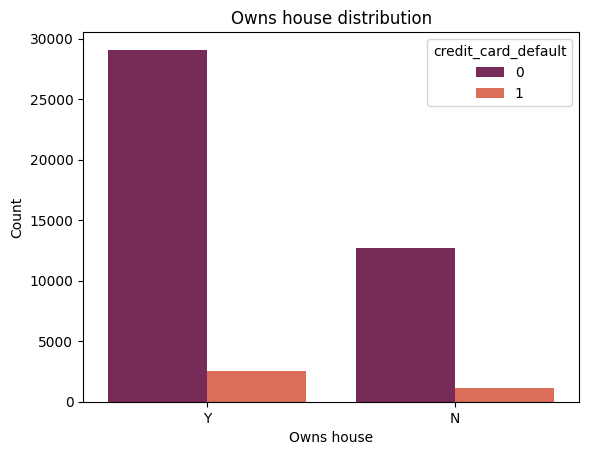

In [11]:
sns.countplot(data=train, x='owns_house', hue='credit_card_default', palette='rocket')
plt.xlabel('Owns house')
plt.ylabel('Count')
plt.title('Owns house distribution')
plt.show()

## Number of children and total family members

The proportion of credit card default in number of children and total family member is similar for all categories. Moreover the most people in dataset do not have children and have 2 family members.

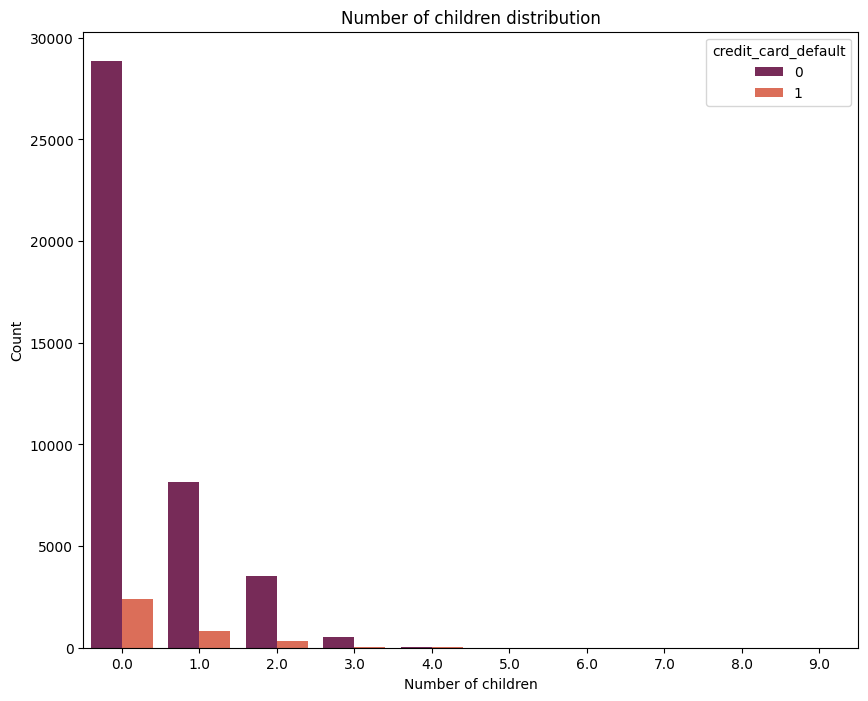

In [12]:
plt.figure(figsize=(10,8))
sns.countplot(data=train, x='no_of_children', hue='credit_card_default', palette='rocket')
plt.xlabel('Number of children')
plt.ylabel('Count')
plt.title('Number of children distribution')
plt.show()

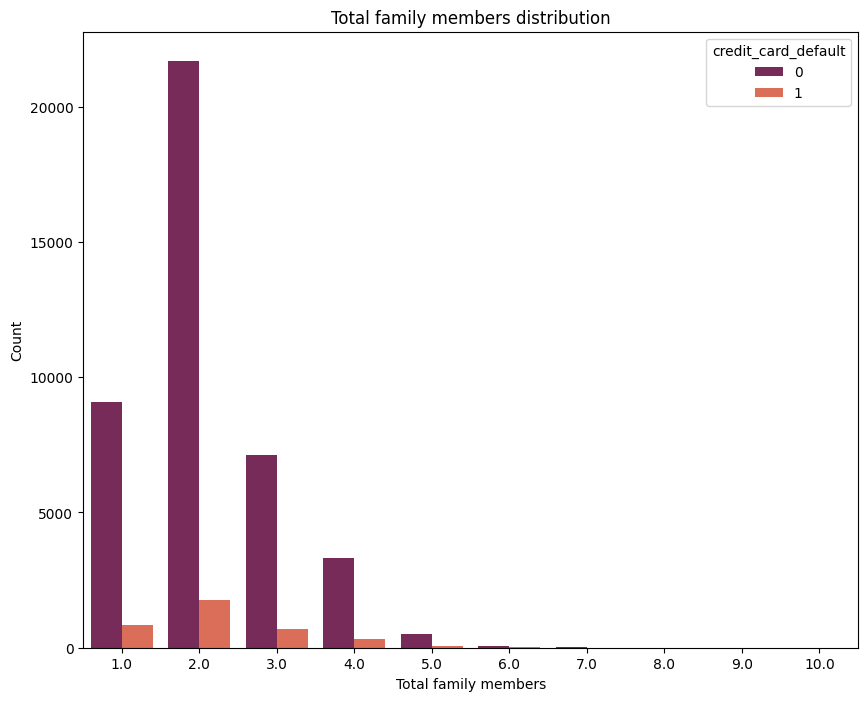

In [13]:
plt.figure(figsize=(10,8))
sns.countplot(data=train, x='total_family_members', hue='credit_card_default', palette='rocket')
plt.xlabel('Total family members')
plt.ylabel('Count')
plt.title('Total family members distribution')
plt.show()

## Net yearly income

Net yearly income is highly positive (right) skewed. It means that the mean is greater than the median and it may cause problems for some models.

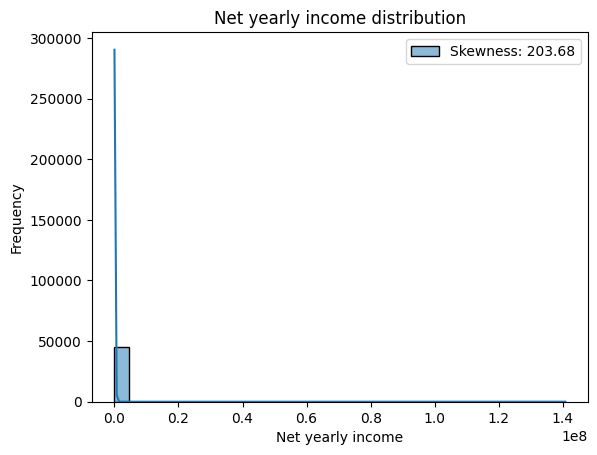

In [14]:
sns.histplot(data=train, kde=True, x='net_yearly_income', bins=30, palette='rocket', label = 'Skewness: %.2f'%(train['net_yearly_income'].skew()))
plt.xlabel('Net yearly income')
plt.ylabel('Frequency')
plt.legend()
plt.title('Net yearly income distribution')
plt.show()

In [15]:
mean_net_yearly_income_0 = train[train['credit_card_default']==0]['net_yearly_income'].mean()
mean_net_yearly_income_1 = train[train['credit_card_default']==1]['net_yearly_income'].mean()
median_net_yearly_income_0 = train[train['credit_card_default']==0]['net_yearly_income'].median()
median_net_yearly_income_1 = train[train['credit_card_default']==1]['net_yearly_income'].median()
print('Mean net yearly income 0: '+ str(mean_net_yearly_income_0))
print('Mean net yearly income 1: '+ str(mean_net_yearly_income_1))
print('Median net yearly income 0: '+ str(median_net_yearly_income_0))
print('Median net yearly income 1: '+ str(median_net_yearly_income_1))

Mean net yearly income 0: 198366.42862108536
Mean net yearly income 1: 226556.08969164186
Median net yearly income 0: 172063.365
Median net yearly income 1: 168195.13


## Number of days employed

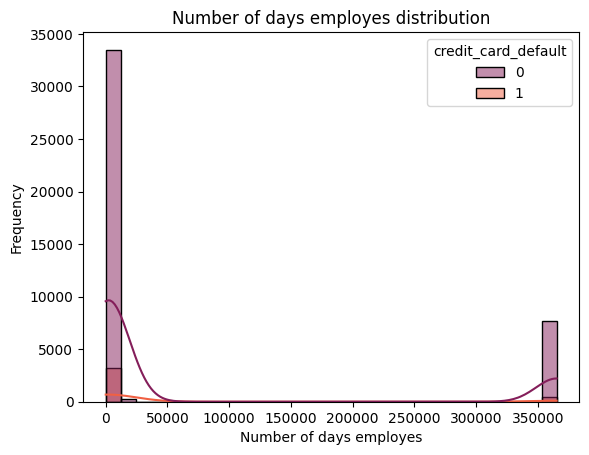

In [16]:
sns.histplot(data=train, kde=True, x='no_of_days_employed', hue='credit_card_default', bins=30, palette='rocket')
plt.xlabel('Number of days employes')
plt.ylabel('Frequency')
plt.title('Number of days employes distribution')
plt.show()

## Occupation type

The most common type of occupation is unknown, which can be a problem because it means we don't have accurate data.

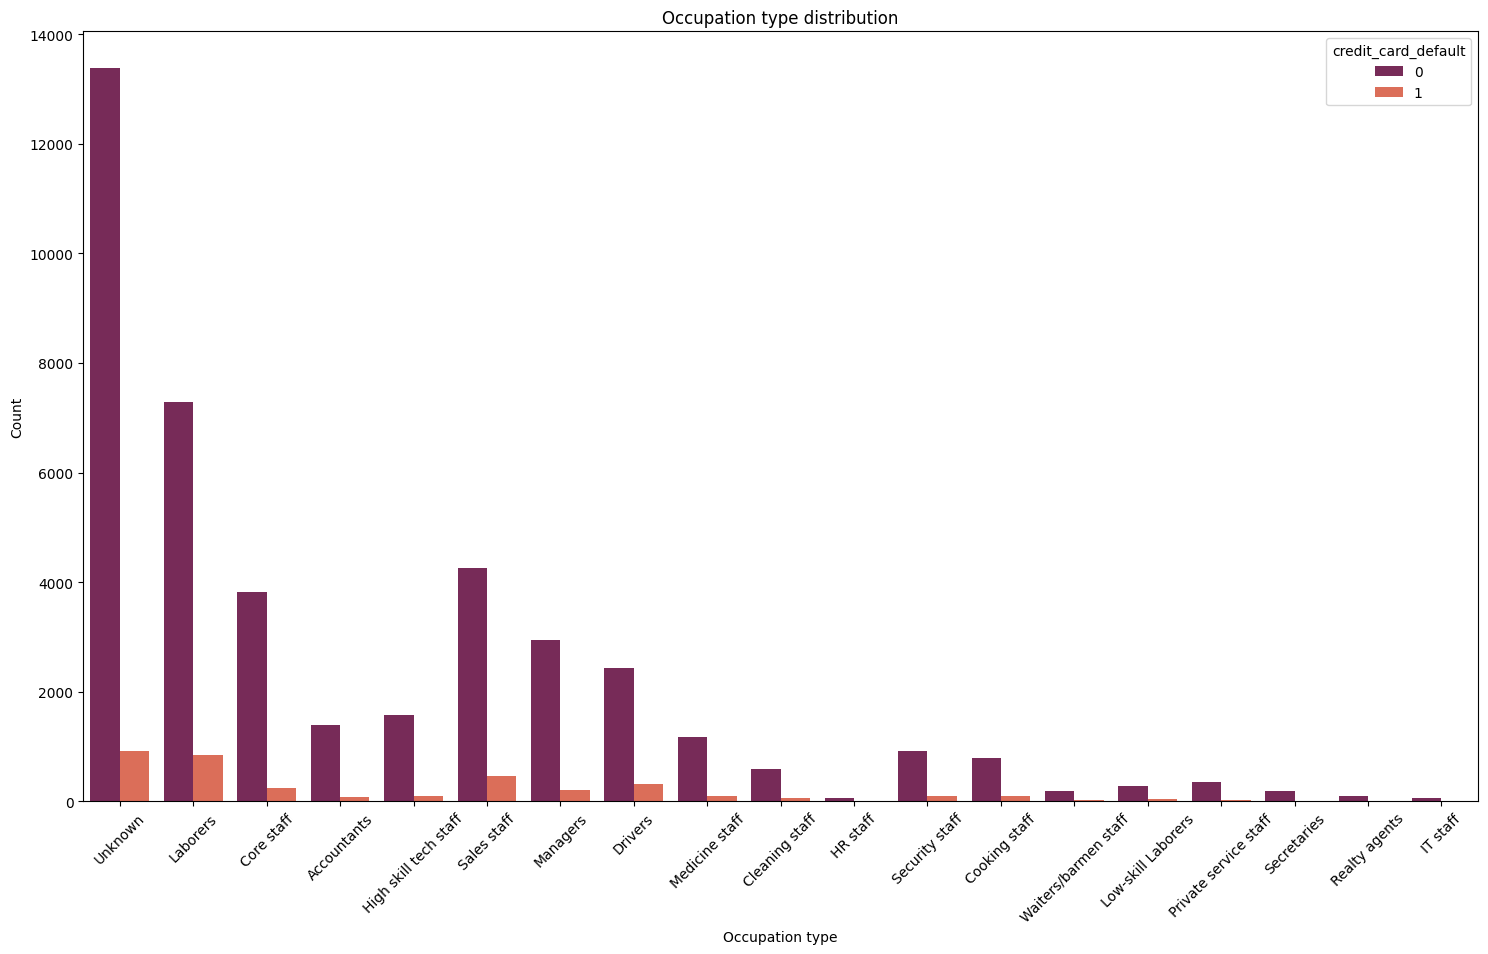

In [17]:
plt.figure(figsize=(18,10))
sns.countplot(data=train, x='occupation_type', hue='credit_card_default', palette='rocket')
plt.xlabel('Occupation type')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.title('Occupation type distribution')
plt.show()

## Migrant worker

Both migrant workers and non-migrant workers have a similar distribution in terms of credit card default.

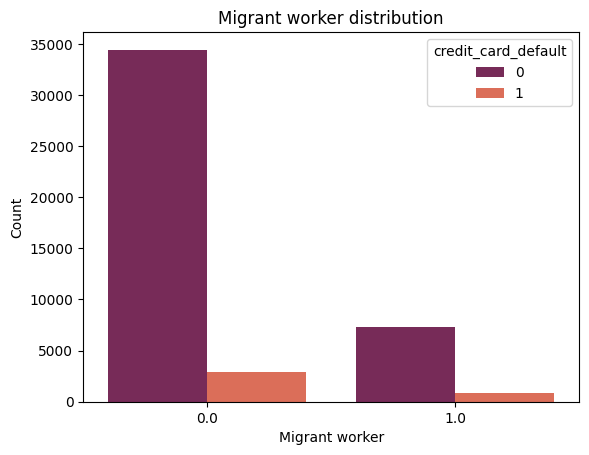

In [18]:
sns.countplot(data=train, x='migrant_worker', hue='credit_card_default', palette='rocket')
plt.xlabel('Migrant worker')
plt.ylabel('Count')
plt.title('Migrant worker distribution')
plt.show()

## Yearly debt payments

The data are right skewed and for both classes of target have similar distribution.

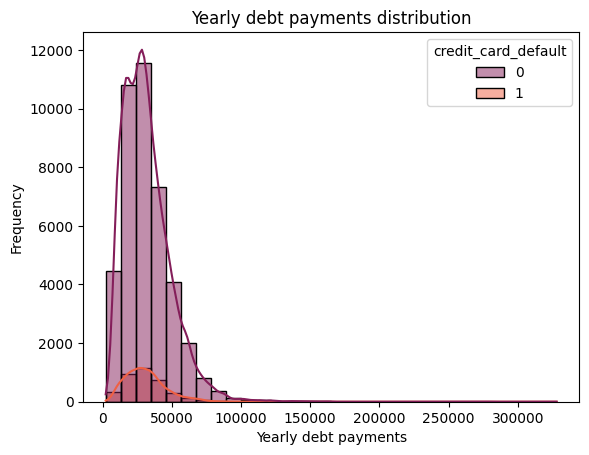

In [19]:
sns.histplot(data=train, kde=True, x='yearly_debt_payments', hue='credit_card_default', bins=30, palette='rocket')
plt.xlabel('Yearly debt payments')
plt.ylabel('Frequency')
plt.title('Yearly debt payments distribution')
plt.show()

In [20]:
'Skewness: %.2f'%(train['yearly_debt_payments'].skew())

'Skewness: 1.72'

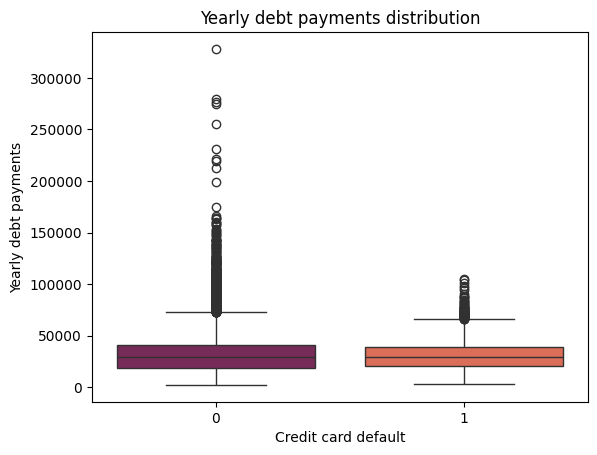

In [21]:
sns.boxplot(data=train, y='yearly_debt_payments', x='credit_card_default', palette='rocket')
plt.xlabel('Credit card default')
plt.ylabel('Yearly debt payments')
plt.title('Yearly debt payments distribution')
plt.show()

## Credit limit

Credit limit is highly positive skewed, which may cause problems for the model.

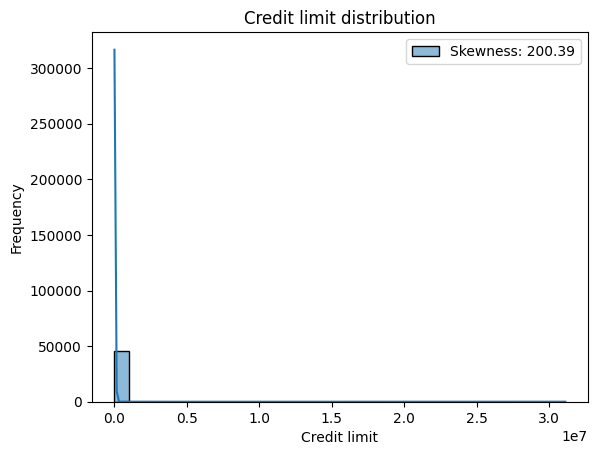

In [22]:
sns.histplot(data=train, kde=True, x='credit_limit', bins=30, palette='rocket', label = 'Skewness: %.2f'%(train['credit_limit'].skew()))
plt.xlabel('Credit limit')
plt.ylabel('Frequency')
plt.title('Credit limit distribution')
plt.legend()
plt.show()

## Credit limit used(%)

It is important to note that default occurs for about more than 70% of the credit limit used.

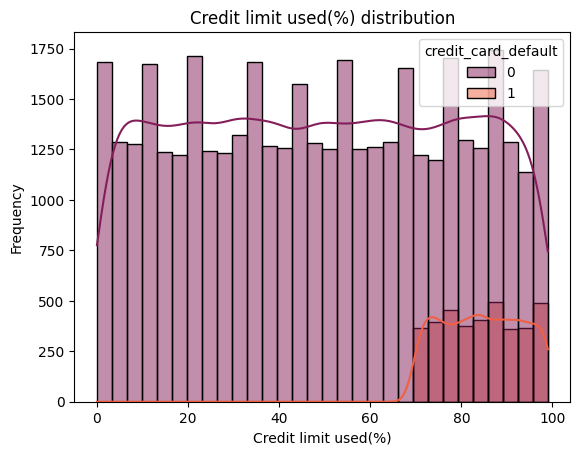

In [23]:
sns.histplot(data=train, kde=True, x='credit_limit_used(%)', hue='credit_card_default', bins=30, palette='rocket')
plt.xlabel('Credit limit used(%)')
plt.ylabel('Frequency')
plt.title('Credit limit used(%) distribution')
plt.show()

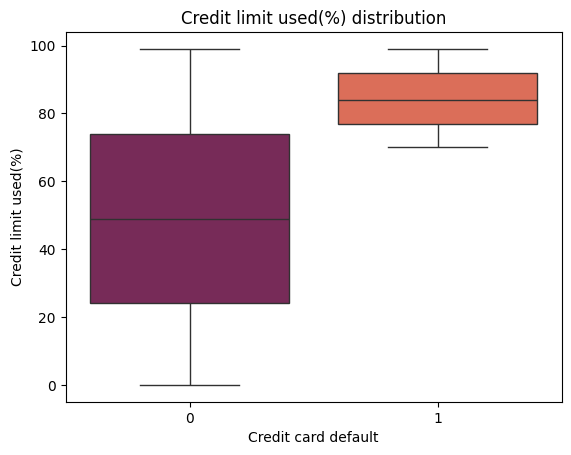

In [24]:
sns.boxplot(data=train, y='credit_limit_used(%)', x='credit_card_default', palette='rocket')
plt.xlabel('Credit card default')
plt.ylabel('Credit limit used(%)')
plt.title('Credit limit used(%) distribution')
plt.show()

## Credit score

It is worth noting that a higher credit score means a lower probability of default, and vice versa.

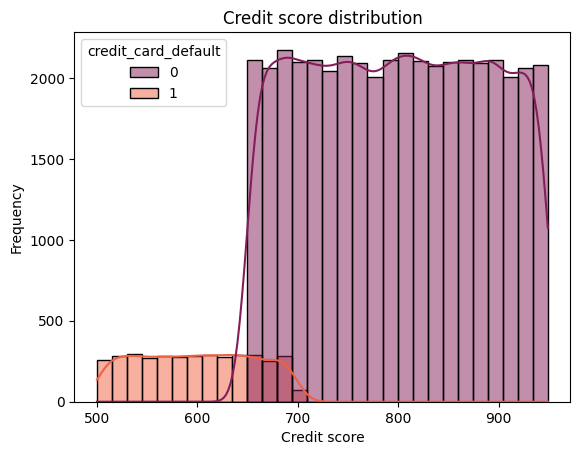

In [25]:
sns.histplot(data=train, kde=True, x='credit_score', hue='credit_card_default', bins=30, palette='rocket')
plt.xlabel('Credit score')
plt.ylabel('Frequency')
plt.title('Credit score distribution')
plt.show()

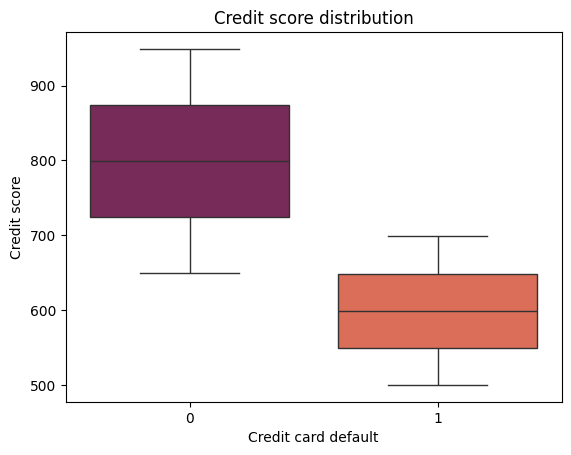

In [26]:
sns.boxplot(data=train, y='credit_score', x='credit_card_default', palette='rocket')
plt.xlabel('Credit card default')
plt.ylabel('Credit score')
plt.title('Credit score distribution')
plt.show()

## Previous defaults

People who defaulted in the past also default now.

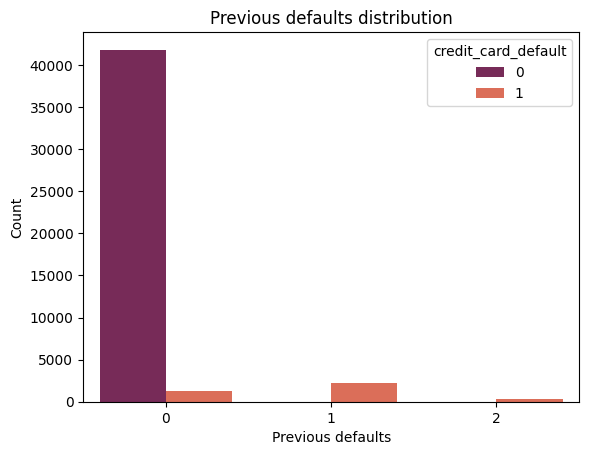

In [27]:
sns.countplot(data=train, x='prev_defaults', hue='credit_card_default', palette='rocket')
plt.xlabel('Previous defaults')
plt.ylabel('Count')
plt.title('Previous defaults distribution')
plt.show()

## Default in last 6 months

Similarly, in the case of default in last 6 months, it means that these people belong to the target class '1'.

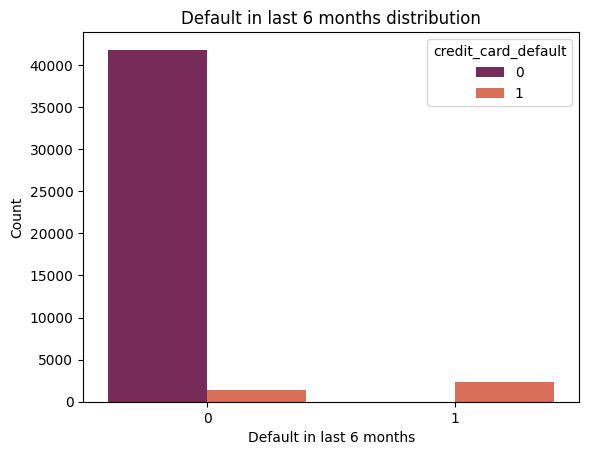

In [28]:
sns.countplot(data=train, x='default_in_last_6months', hue='credit_card_default', palette='rocket')
plt.xlabel('Default in last 6 months')
plt.ylabel('Count')
plt.title('Default in last 6 months distribution')
plt.show()

# Data preprocessing

## Missing values

We can see which values are missing. This is a small part of all the rows, which are 45528, so we can drop the missing data.

In [29]:
missing_values = train.isnull().sum()

columns_with_missing = missing_values[missing_values > 0]
print("Columns with missing values:")
print(columns_with_missing)

Columns with missing values:
owns_car                547
no_of_children          774
no_of_days_employed     463
total_family_members     83
migrant_worker           87
yearly_debt_payments     95
credit_score              8
dtype: int64


In [30]:
train.dropna(inplace=True)

## Log transformations of continuous variables

The log transformation reduces or removes the skewness of our original data. It is important as some features are highly skewed. 

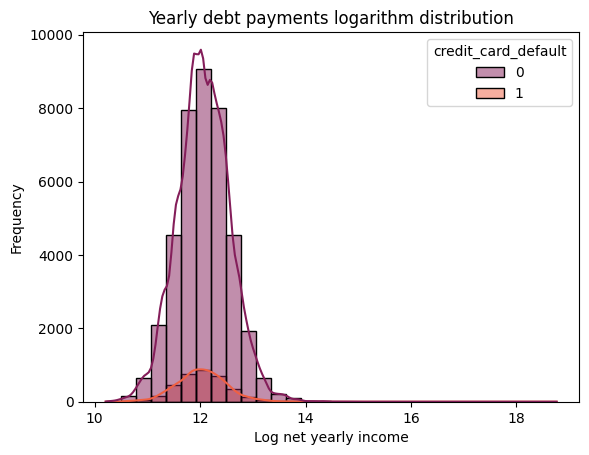

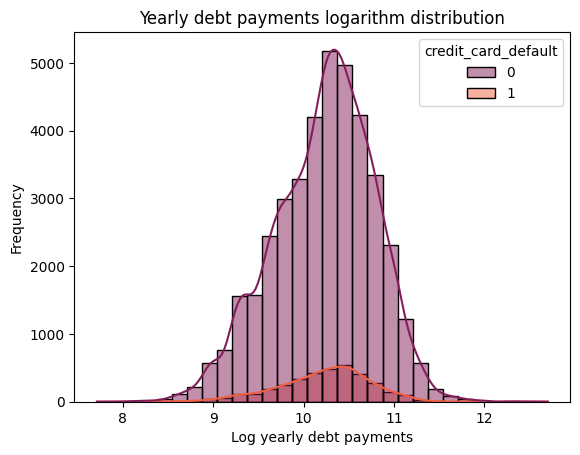

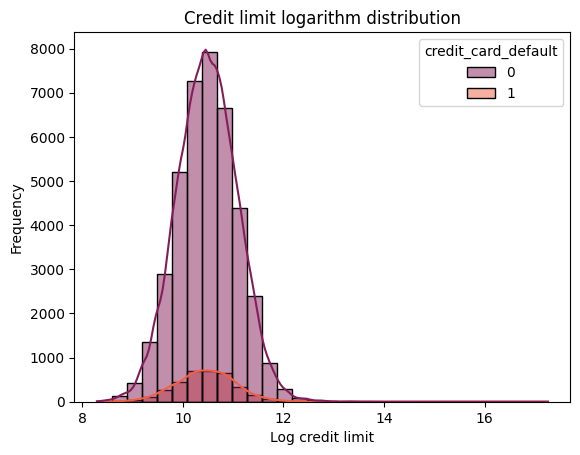

In [31]:
train['log_net_yearly_income'] = np.log(train['net_yearly_income'])
train['log_yearly_debt_payments'] = np.log(train['yearly_debt_payments'])
train['log_credit_limit'] = np.log(train['credit_limit'])

sns.histplot(data=train, kde=True, x='log_net_yearly_income', hue='credit_card_default', bins=30, palette='rocket')
plt.xlabel('Log net yearly income')
plt.ylabel('Frequency')
plt.title('Yearly debt payments logarithm distribution')
plt.show()

sns.histplot(data=train, kde=True, x='log_yearly_debt_payments', hue='credit_card_default', bins=30, palette='rocket')
plt.xlabel('Log yearly debt payments')
plt.ylabel('Frequency')
plt.title('Yearly debt payments logarithm distribution')
plt.show()

sns.histplot(data=train, kde=True, x='log_credit_limit', hue='credit_card_default', bins=30, palette='rocket')
plt.xlabel('Log credit limit')
plt.ylabel('Frequency')
plt.title('Credit limit logarithm distribution')
plt.show()

## Encoding categorical features

To prepare the data for some of the models, we need to use categorical features encoding. We will use ordinal encoding, which encodes categorical features as an integer array.

In [32]:
cat_cols = ['gender', 'owns_car', 'owns_house', 'occupation_type', 'migrant_worker', 'default_in_last_6months']

In [33]:
enc = OrdinalEncoder()

enc.fit(train[cat_cols])
train[cat_cols] = enc.transform(train[cat_cols])

## Correlation heatmap

There is a very high correlation of the target with some variables like prev_defaults, default_in_last_6months. Other highly correlated variables are credit_score, credit_limit_used (%). However, when creating the model, one has to be careful about multicollinearity of variables which can affect the predictions of some models.

In [34]:
train.drop(columns=['customer_id'], inplace=True)

<Axes: >

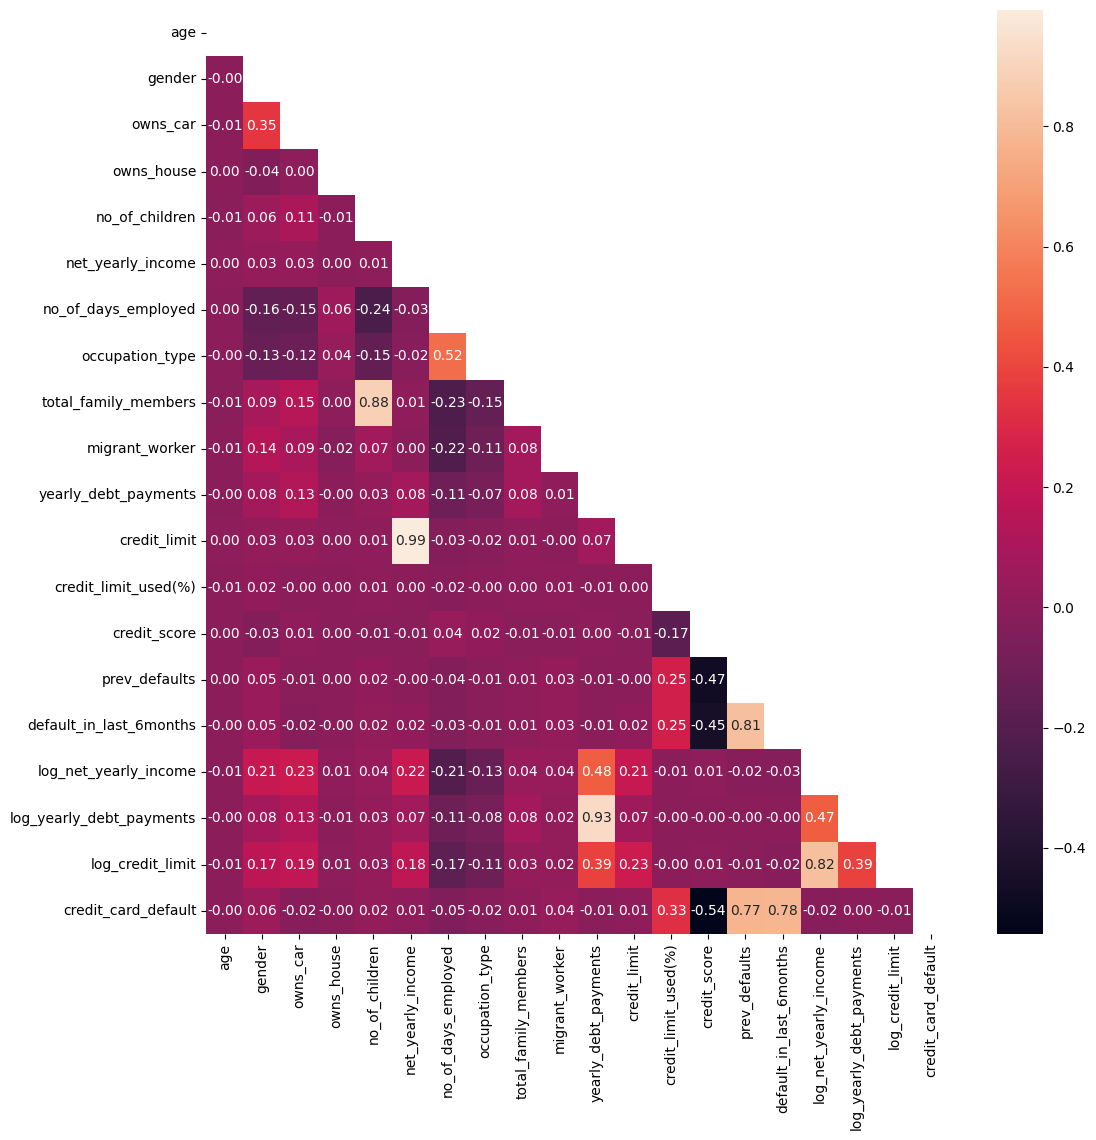

In [35]:
other_columns = [col for col in train.columns if col != 'credit_card_default']

desired_columns = other_columns + ['credit_card_default']
train = train[desired_columns]

corr_matrix = train.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
plt.figure(figsize=(12,12))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f')

# Models

For classification, we'll use several models to evaluate their performance and choose the best one.

We choose 4 features that have the highest correlation with target variable.

We'll evaluate the models by 4 different metrics: accuracy, precision, recall and F1-score. Moreover, we'll visualize the confusion matrix that summarizes the performance of a machine learning model on a set of test data. It is a means of displaying the number of accurate and inaccurate instances based on the model’s predictions.

<br>

Instances of confusion matrix produced by the model:
* **TP** (true positives) - occur when the model accurately predicts a positive data point
* **TF** (true negatives) - occur when the model accurately predicts a negative data point
* **FP** (false positives) - occur when the model predicts a positive data point incorrectly
* **FN** (false negatives) - occur when the model mispredicts a negative data point

<br>

Metrics used:
* **accuracy** = (TP+TN)/(TP+FP+FN+TN)
* **precision** = TP / (TP + FP)
* **recall** = TP / (TP + FN)
* **F1 score** = 2 * (precision * recall) / (precision + recall)

<br>

If minimizing losses from defaults is critical we may prioritize metrics that minimize false negatives, such as recall or the F1 score. If we want to minimize false positives to avoid unnecessarily restricting credit for customers who are unlikely to default, we might prioritize precision. In this case minimizing losses from defaults can be more important.

https://www.geeksforgeeks.org/confusion-matrix-machine-learning/

In [36]:
train_features = ['credit_limit_used(%)', 'credit_score', 'default_in_last_6months']

X = train[train_features]
y = train['credit_card_default']

In [40]:
X

,credit_limit_used(%),credit_score,default_in_last_6months
0,73,544.0,1.0
1,52,857.0,0.0
2,43,650.0,0.0
3,20,754.0,0.0
4,75,927.0,0.0
...,...,...,...
45523,82,907.0,0.0
45524,32,679.0,0.0
45525,46,727.0,0.0
45526,92,805.0,0.0


In [37]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

metrics = [accuracy_score, precision_score, recall_score, f1_score, confusion_matrix]

def model_training(model):
    model.fit(X_train, y_train)
    return model.predict(X_test)

def evaluate(preds, metrics):
    scores = []
    for metric in metrics:
        scores.append(metric(preds, y_test))
    conf_matrix = confusion_matrix(preds, y_test)
    return scores, conf_matrix

def plot_evaluation(scores, conf_matrix):
    print('Accuracy: '+str(scores[0]))
    print('Precision: '+str(scores[1]))
    print('Recall: '+str(scores[2]))
    print('F1 Score: '+str(scores[3]))
    group_names = ['TN','FP','FN','TP']
    group_counts = ["{0:0.0f}".format(value) for value in
                conf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         conf_matrix.flatten()/np.sum(conf_matrix)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize=(8,8))
    sns.heatmap(conf_matrix, annot=labels, fmt='')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()

## K-nearest neighbors

Accuracy: 0.9758676166398529
Precision: 0.7686062246278755
Recall: 0.9357495881383855
F1 Score: 0.8439821693907875


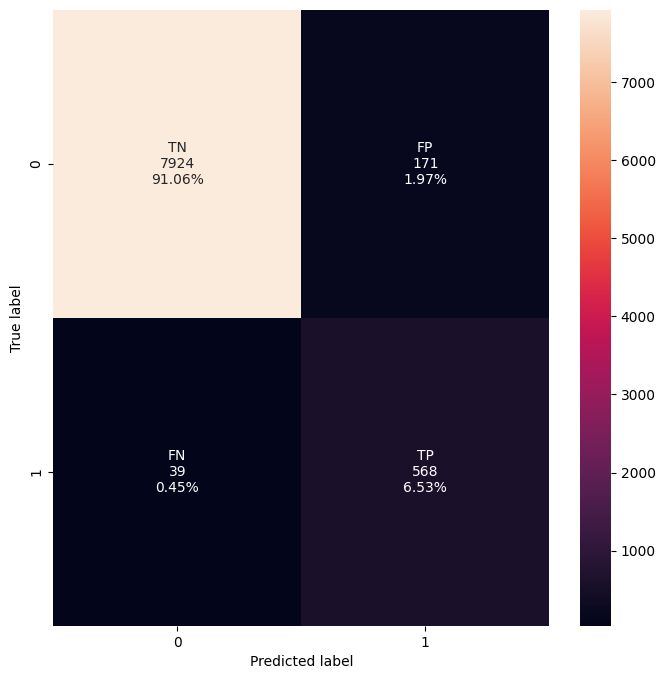

In [38]:
preds = model_training(KNeighborsClassifier(n_neighbors=4))
scores, conf_matrix = evaluate(preds, metrics)
plot_evaluation(scores, conf_matrix)

## Logistic Regression

In [ ]:
preds = model_training(LogisticRegression(random_state=42))
scores, conf_matrix = evaluate(preds, metrics)
plot_evaluation(scores, conf_matrix)

## Decision Tree

In [ ]:
preds = model_training(DecisionTreeClassifier(random_state=42))
scores, conf_matrix = evaluate(preds, metrics)
plot_evaluation(scores, conf_matrix)

## Gaussian Naive Bayes

In [ ]:
preds = model_training(GaussianNB())
scores, conf_matrix = evaluate(preds, metrics)
plot_evaluation(scores, conf_matrix)

We have chosen Logistic Regression as the best model for our classification task as it shows the best results.

In [ ]:
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Submission

Now, we'll make predictions and prepare a submission file.

In [ ]:
test = pd.read_csv('/kaggle/input/amexpert-codelab-2021/test.csv')

In [ ]:
submission = pd.DataFrame()
submission['customer_id'] = test['customer_id']

In [ ]:
missing_values = test.isnull().sum()

columns_with_missing = missing_values[missing_values > 0]
print("Columns with missing values:")
print(columns_with_missing)

median_credit_score = train['credit_score'].median()
test['credit_score'] = test['credit_score'].fillna(median_credit_score)

In [ ]:
test = test[train_features]

In [ ]:
preds = model.predict(test)
submission['credit_card_default'] = preds
submission

In [ ]:
submission.to_csv('submission.csv')

In [41]:
import qt
from qt import dt, np, pd

In [42]:
pd.read_csv('corn_regional_market_share.csv')

,country_name,country_code,region_name,region_id,percent_country_production
0,Argentina,AR,Buenos Aires,bffad37a-7c60-432f-984a-8ea83a944311,27.00
1,Argentina,AR,Córdoba,154a85ea-1f8c-4fb8-b0d4-ba26087d9ee7,35.00
2,Argentina,AR,Santa Fe,8ab0a622-787a-43cb-b13f-95955bf3dfd8,10.00
3,Argentina,AR,Santiago del Estero,50e23c9b-44b4-4bbd-8a94-a722c289bb4a,9.00
4,Argentina,AR,Entre Ríos,db76c31d-17f5-4980-b5fc-038ca13cf164,12.00
...,...,...,...,...,...
90,South Africa,ZA,North West,11270cdf-d7c9-4f23-a8c8-fc44126d6fcd,17.00
91,South Africa,ZA,Northern Cape,afcc765a-117b-4a57-8b81-397b36817760,4.11
92,South Africa,ZA,Gauteng,c7c3cdc4-9fe3-4e97-9a6f-bfc5868865d3,4.67
93,South Africa,ZA,KwaZulu-Natal,493ad2e4-3b3e-4390-b171-047d632d749e,5.00


In [43]:
pd.read_csv('corn_climate_risk_futures_daily_master.csv')

,ID,crop_name,country_name,country_code,region_name,region_id,harvest_period,growing_season_year,date_on,climate_risk_cnt_locations_heat_stress_risk_low,climate_risk_cnt_locations_heat_stress_risk_medium,climate_risk_cnt_locations_heat_stress_risk_high,climate_risk_cnt_locations_unseasonably_cold_risk_low,climate_risk_cnt_locations_unseasonably_cold_risk_medium,climate_risk_cnt_locations_unseasonably_cold_risk_high,climate_risk_cnt_locations_excess_precip_risk_low,climate_risk_cnt_locations_excess_precip_risk_medium,climate_risk_cnt_locations_excess_precip_risk_high,climate_risk_cnt_locations_drought_risk_low,climate_risk_cnt_locations_drought_risk_medium,climate_risk_cnt_locations_drought_risk_high,futures_close_ZC_1,futures_close_ZC_2,futures_close_ZW_1,futures_close_ZS_1,futures_zc1_ret_pct,futures_zc1_ret_log,futures_zc_term_spread,futures_zc_term_ratio,futures_zc1_ma_20,futures_zc1_ma_60,futures_zc1_ma_120,futures_zc1_vol_20,futures_zc1_vol_60,futures_zw_zc_spread,futures_zc_zw_ratio,futures_zs_zc_spread,futures_zc_zs_ratio,date_on_year,date_on_month,date_on_year_month
0,8af42722-3f05-4ede-80fc-605e0e2b3b67,Corn: Commodity Tracked,Argentina,AR,Buenos Aires,bffad37a-7c60-432f-984a-8ea83a944311,Harvest,2017,2016-06-15,23,0,0,23,0,0,23,0,0,16,7,0,429.00,434.00,477.50,"1,156.00",-0.02,-0.02,5.00,1.01,414.41,387.70,375.01,0.01,0.02,48.50,0.90,727.00,0.37,2016,6,2016_06
1,54f4ddc5-e7ab-4bfb-ad6a-5649841af563,Corn: Commodity Tracked,Argentina,AR,Buenos Aires,bffad37a-7c60-432f-984a-8ea83a944311,Harvest,2017,2016-06-16,23,0,0,23,0,0,23,0,0,14,9,0,425.25,430.50,472.50,"1,134.50",-0.01,-0.01,5.25,1.01,415.70,388.62,375.51,0.01,0.02,47.25,0.90,709.25,0.37,2016,6,2016_06
2,63a41fce-d371-4295-a58a-dc6491664020,Corn: Commodity Tracked,Argentina,AR,Buenos Aires,bffad37a-7c60-432f-984a-8ea83a944311,Harvest,2017,2016-06-17,23,0,0,14,1,8,23,0,0,14,8,1,437.75,442.75,481.25,"1,159.50",0.03,0.03,5.00,1.01,418.09,389.77,376.12,0.01,0.02,43.50,0.91,721.75,0.38,2016,6,2016_06
3,cddfa440-e0eb-4735-beb1-1aca2afefe53,Corn: Commodity Tracked,Argentina,AR,Buenos Aires,bffad37a-7c60-432f-984a-8ea83a944311,Harvest,2017,2016-06-18,23,0,0,20,0,3,23,0,0,15,6,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016,6,2016_06
4,3eaacfe1-29be-4da9-b5c9-a9457d2d2b83,Corn: Commodity Tracked,Argentina,AR,Buenos Aires,bffad37a-7c60-432f-984a-8ea83a944311,Harvest,2017,2016-06-19,23,0,0,21,2,0,23,0,0,16,7,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016,6,2016_06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320656,2e5ef4bc-4a33-45d1-86e7-6e45476c7b67,Corn: Commodity Tracked,United States,US,Wisconsin,216ae69a-e4e3-4319-a408-54b9fb807570,Off-season,2026,2025-12-12,7,0,0,0,0,7,6,1,0,7,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025,12,2025_12
320657,8d21c879-d756-4d0f-aed4-a87f7ae74f02,Corn: Commodity Tracked,United States,US,Wisconsin,216ae69a-e4e3-4319-a408-54b9fb807570,Off-season,2026,2025-12-13,7,0,0,0,2,5,7,0,0,7,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025,12,2025_12
320658,c42f9a0e-4030-4332-925f-89365a643f55,Corn: Commodity Tracked,United States,US,Wisconsin,216ae69a-e4e3-4319-a408-54b9fb807570,Off-season,2026,2025-12-14,7,0,0,0,0,7,7,0,0,7,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025,12,2025_12
320659,0b23d369-fc09-4895-be6f-1bb6bfac9c6b,Corn: Commodity Tracked,United States,US,Wisconsin,216ae69a-e4e3-4319-a408-54b9fb807570,Off-season,2026,2025-12-15,7,0,0,7,0,0,7,0,0,7,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025,12,2025_12
